In [1]:
import pandas as pd
import os
import seaborn as sns
from collections import Counter
import shutil
from matplotlib import rcParams

rcParams['figure.figsize'] = 25, 5

In [2]:
def extract_first_three_levels(ec_number):
    levels = ec_number.split('.')
    return '.'.join(levels[:3])

In [3]:
# Get list of IDs in redundancy reduced 2002 dataset
data_ids = [item.replace('.pdb', '') for item in os.listdir("testing/2_after_redundancy_reduction/Swiss-Prot_2017_redundancy_reduced")]
data_ids[:10]

['O77206',
 'Q9L9F6',
 'P46010',
 'Q9BXR0',
 'P50861',
 'C7ASJ5',
 'P48825',
 'P16184',
 'Q05116',
 'Q12001']

In [5]:
data = pd.read_excel("testing/hfsp_supplement/Mahlich.335.sup.data.1.xlsx", sheet_name="Swiss-Prot 2017")

# Create EC_3 column
data["ec3"] = data["ec_number"].apply(extract_first_three_levels)

# Filter for proteins after redundancy reduction
data = data[data['id'].isin(data_ids)]

data

,id,ec_number,domain,ec3
0,P00533,2.7.10.1,Eukarya,2.7.10
3,P21802,2.7.10.1,Eukarya,2.7.10
5,P11362,2.7.10.1,Eukarya,2.7.10
6,P04626,2.7.10.1,Eukarya,2.7.10
7,P10721,2.7.10.1,Eukarya,2.7.10
...,...,...,...,...
7017,P48775,1.13.11.11,Eukarya,1.13.11
7018,P77806,2.6.1.88,Bacteria,2.6.1
7019,P14680,2.7.12.1,Eukarya,2.7.12
7020,P36217,3.2.1.8,Eukarya,3.2.1


[Text(0.5, 0, '# Proteins per EC category'),
 Text(0, 0.5, '# EC category'),
 (-18.450000000000003, 400.0),
 (0.0, 30.0)]

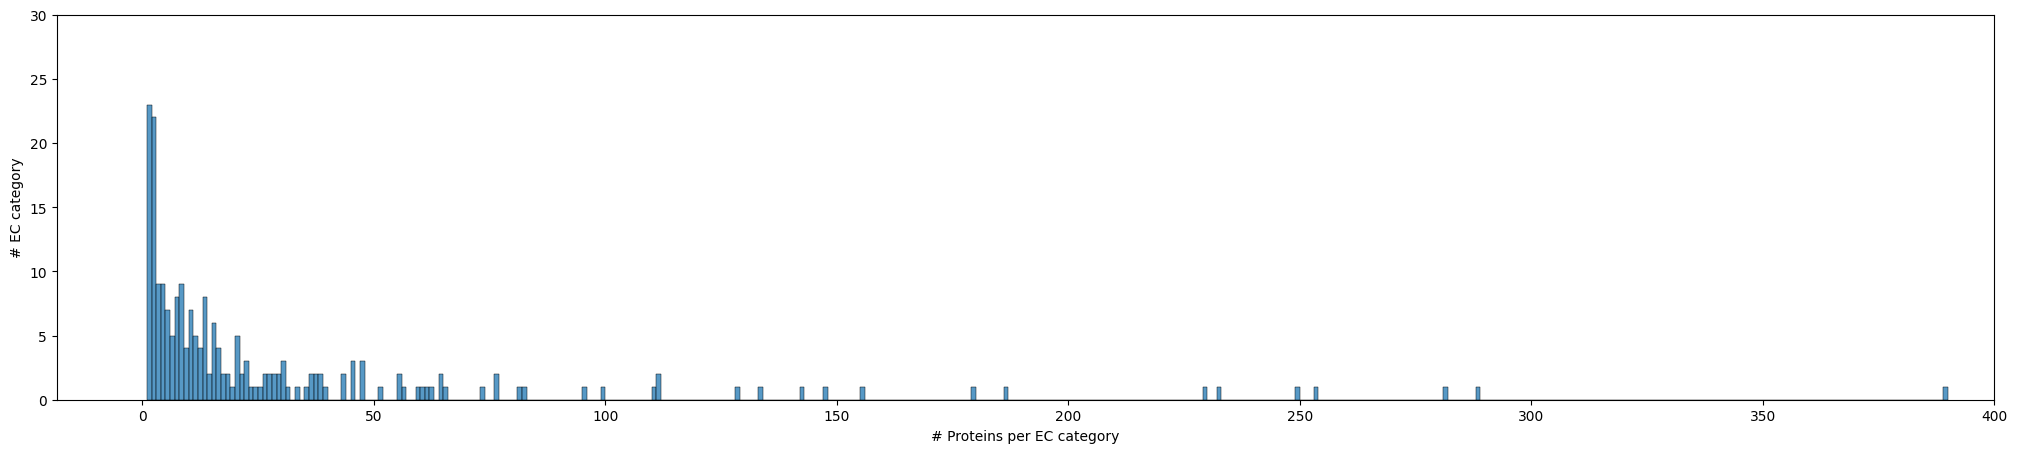

In [6]:
hist = sns.histplot(list(Counter(data["ec3"]).values()), binwidth=1)
hist.set(xlabel = "# Proteins per EC category", ylabel = "# EC category", xlim=(None, 400), ylim=(0, 30))

In [7]:
data

,id,ec_number,domain,ec3
0,P00533,2.7.10.1,Eukarya,2.7.10
3,P21802,2.7.10.1,Eukarya,2.7.10
5,P11362,2.7.10.1,Eukarya,2.7.10
6,P04626,2.7.10.1,Eukarya,2.7.10
7,P10721,2.7.10.1,Eukarya,2.7.10
...,...,...,...,...
7017,P48775,1.13.11.11,Eukarya,1.13.11
7018,P77806,2.6.1.88,Bacteria,2.6.1
7019,P14680,2.7.12.1,Eukarya,2.7.12
7020,P36217,3.2.1.8,Eukarya,3.2.1


In [8]:
Counter(data["ec3"])

Counter({'2.7.11': 390,
         '3.2.1': 288,
         '1.1.1': 281,
         '2.1.1': 253,
         '2.4.1': 249,
         '2.3.1': 232,
         '2.7.1': 229,
         '2.5.1': 186,
         '2.7.10': 179,
         '3.1.3': 155,
         '4.1.1': 147,
         '2.7.7': 142,
         '3.1.1': 133,
         '4.2.1': 128,
         '3.4.21': 111,
         '6.1.1': 111,
         '1.14.13': 110,
         '3.5.1': 99,
         '3.1.4': 95,
         '1.2.1': 82,
         '2.6.1': 81,
         '3.6.1': 76,
         '2.4.2': 76,
         '4.2.3': 73,
         '3.4.22': 65,
         '5.3.1': 64,
         '1.3.1': 64,
         '2.7.4': 62,
         '1.11.1': 61,
         '1.13.11': 60,
         '4.1.2': 59,
         '5.4.99': 56,
         '2.7.13': 55,
         '3.5.4': 55,
         '3.4.24': 51,
         '1.14.11': 47,
         '3.5.2': 47,
         '1.4.3': 47,
         '3.6.4': 45,
         '6.3.2': 45,
         '3.6.3': 45,
         '6.3.4': 43,
         '2.7.12': 43,
         '3.4.23': 39,

In [9]:
def sample_group(group):
    return group.sample(min(len(group), 50), random_state=42)

data_50 = data.groupby('ec3').apply(sample_group).reset_index(drop=True)
data_50

/tmp/ipykernel_3262689/970966988.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_50 = data.groupby('ec3').apply(sample_group).reset_index(drop=True)


,id,ec_number,domain,ec3
0,P12013,1.1.1.343,Bacteria,1.1.1
1,Q15GI3,1.1.1.319,Eukarya,1.1.1
2,P0C0Y4,1.1.1.138,Eukarya,1.1.1
3,Q8TC12,1.1.1.300,Eukarya,1.1.1
4,Q9WZZ1,1.1.1.267,Bacteria,1.1.1
...,...,...,...,...
3964,Q9HH07,6.5.1.6,Archaea,6.5.1
3965,P49917,6.5.1.1,Eukarya,6.5.1
3966,P49421,6.5.1.2,Bacteria,6.5.1
3967,Q980T8,6.5.1.1,Archaea,6.5.1


[Text(0.5, 0, '# Proteins per EC category'),
 Text(0, 0.5, '# EC category'),
 (-17.0, 400.0),
 (0.0, 30.0)]

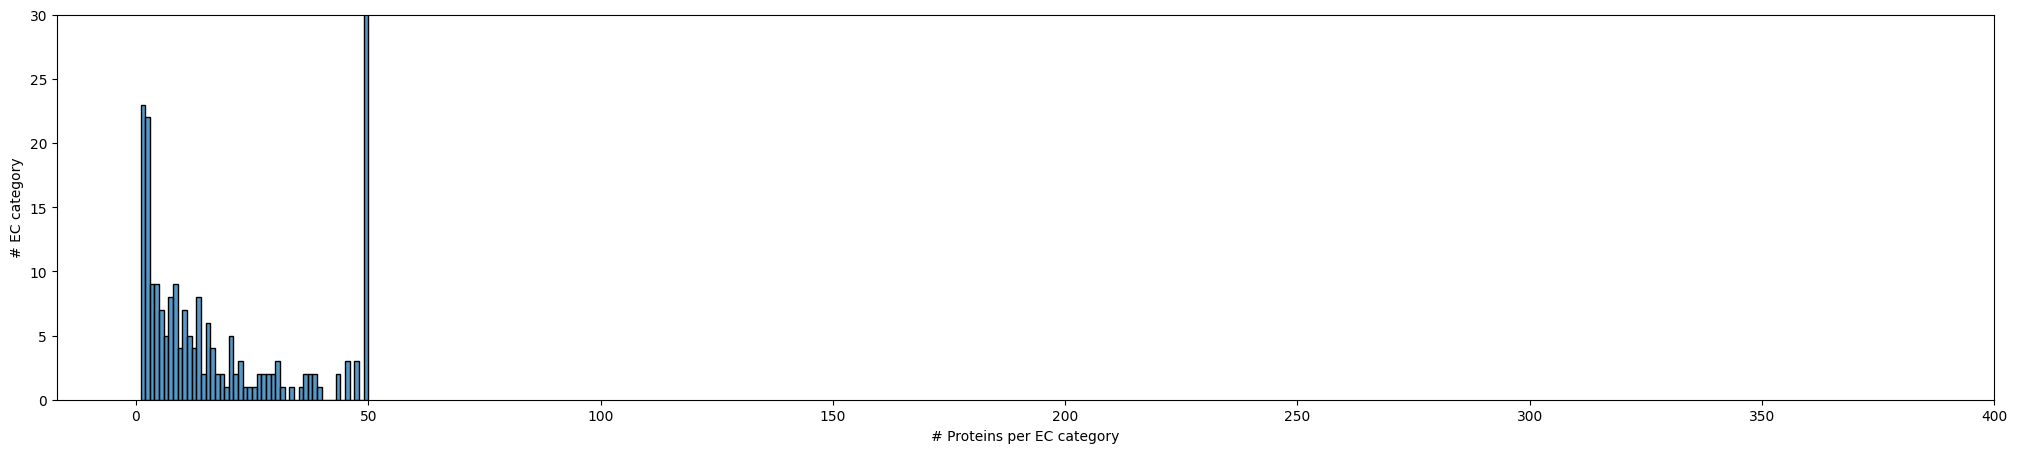

In [11]:
hist2 = sns.histplot(list(Counter(data_50["ec3"]).values()), binwidth=1)
hist2.set(xlabel = "# Proteins per EC category", ylabel = "# EC category", xlim=(-17, 400), ylim=(0, 30))

In [10]:
data_50

,id,ec_number,domain,ec3
0,P41562,1.1.1.42,Eukarya,1.1.1
1,Q59477,1.1.1.202,Bacteria,1.1.1
2,Q00055,1.1.1.8,Eukarya,1.1.1
3,P40288,1.1.1.47,Bacteria,1.1.1
4,Q38707,1.1.1.255,Eukarya,1.1.1
...,...,...,...,...
2711,O87703,6.5.1.2,Bacteria,6.5.1
2712,P49916,6.5.1.1,Eukarya,6.5.1
2713,Q08387,6.5.1.1,Eukarya,6.5.1
2714,Q9HH07,6.5.1.6,Archaea,6.5.1


In [12]:
source = "testing/2_after_redundancy_reduction/Swiss-Prot_2017_redundancy_reduced"
target = "testing/3_after_ec_filtering/Swiss-Prot_2017_redundancy_reduced_50"

# Subset PDB files to data_50 entries
if not os.path.exists(target):
    os.makedirs(target)

for pdb_id in data_50["id"]:
    protein_source_path = os.path.join(source, f"{pdb_id}.pdb")
    protein_target_path = os.path.join(target, f"{pdb_id}.pdb")
    if os.path.exists(protein_source_path):
        shutil.copy(protein_source_path, protein_target_path)
    else:
        raise ValueError(f"source/{pdb_id}.pdb not found")

In [13]:
data_50.to_csv("testing/3_after_ec_filtering/Swiss-Prot_2017_redundancy_reduced_50.tsv", sep="\t", index=False)